### Load data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pickle

In [2]:
#load dicts

with open('output/GP_analysis_divelo.pkl', 'rb') as f:
    divelo = pickle.load(f)
    
with open('output/GP_analysis_expimap.pkl', 'rb') as f:
    expimap = pickle.load(f)
    
with open('output/GP_analysis_ivelo.pkl', 'rb') as f:
    ivelo = pickle.load(f)

In [14]:
expimap

defaultdict(dict,
            {'Pre-endocrine': {'terms': array([], dtype='<U30'),
              'bf_scores': array([], dtype=float32),
              'sig_GP_index': []},
             'Ductal': {'terms': array(['BETA_CELLS', 'CAJAL-RETZIUS_CELLS', 'DUCTAL_CELLS',
                     'ENDOTHELIAL_CELLS', 'ENTEROCYTES', 'ENTEROENDOCRINE_CELLS',
                     'ERYTHROID-LIKE_AND_ERYTHROID_P', 'HEPATIC_STELLATE_CELLS',
                     'INTERNEURONS', 'MÜLLER_CELLS', 'NEURONS',
                     'OLFACTORY_EPITHELIAL_CELLS', 'CELL_CELL_COMMUNICATION',
                     'PHOSPHOLIPID_METABOLISM', 'METABOLISM_OF_AMINO_ACIDS_AND_',
                     'NEURONAL_SYSTEM', 'REGULATION_OF_BETA_CELL_DEVELO',
                     'SIGNALING_BY_GPCR', 'TRANSMEMBRANE_TRANSPORT_OF_SMA',
                     'PROTEIN_FOLDING', 'METABOLISM_OF_CARBOHYDRATES',
                     'ADAPTIVE_IMMUNE_SYSTEM'], dtype='<U30'),
              'bf_scores': array([-2.3479419, -2.5445013,  2.3158

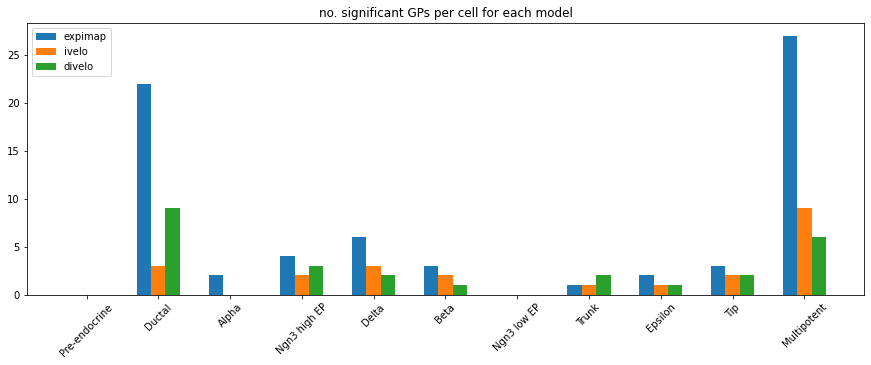

In [18]:
#plot no of sig GPs per cell

#expimap
cell_types=list(expimap.keys())
no_sig_GPs_expimap=[len(expimap[ct]["terms"]) for ct in cell_types]
no_sig_GPs_ivelo=[len(ivelo[ct]["terms"]) for ct in cell_types]
no_sig_GPs_divelo=[len(divelo[ct]["terms"]) for ct in cell_types]

X_axis = np.arange(len(cell_types))

plt.figure(figsize=(15, 5))
plt.xticks(X_axis, cell_types, rotation = 45)

#add comparison of mult models
plt.title("no. significant GPs per cell for each model")
plt.bar(X_axis - 0.2, no_sig_GPs_expimap, 0.2, label = 'expimap')
plt.bar(X_axis, no_sig_GPs_ivelo, 0.2, label = 'ivelo')
plt.bar(X_axis + 0.2, no_sig_GPs_divelo, 0.2, label = 'divelo')
plt.legend()
  

In [12]:
shared_GPs={}
for ct in expimap.keys():
    shared_set=set(expimap[ct]["terms"]).intersection(set(ivelo[ct]["terms"]), set(divelo[ct]["terms"]))
    if bool(shared_set):
        shared_GPs[ct]=list(shared_set)

{'Ductal': ['INTERNEURONS', 'SIGNALING_BY_GPCR']}


In [14]:
shared_GPs.keys()

dict_keys(['Ductal'])

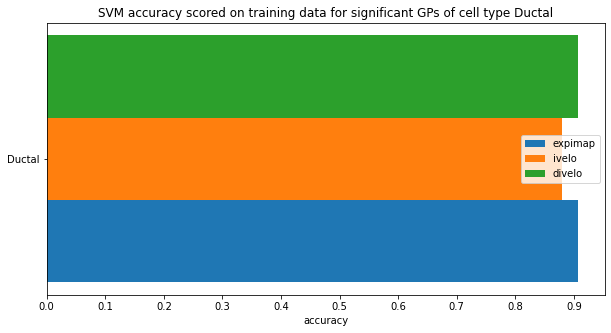

In [40]:
#shared GPs
#plot accuracies per cell
cell_types=list(shared_GPs.keys())
plt.figure(figsize=(10, 5))
plt.title(f"SVM accuracy scored on training data for significant GPs of cell type {ct}")
for i, ct in enumerate(cell_types):
    
    #plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    
    ind = np.arange(len(shared_GPs))

    
    plt.yticks(ind, cell_types)

    xvals_expimap = expimap[ct]["acc"]
    xvals_ivelo = ivelo[ct]["acc"]
    xvals_divelo = divelo[ct]["acc"]
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.1))
    plt.legend()

/tmp/ipykernel_50075/4016891326.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


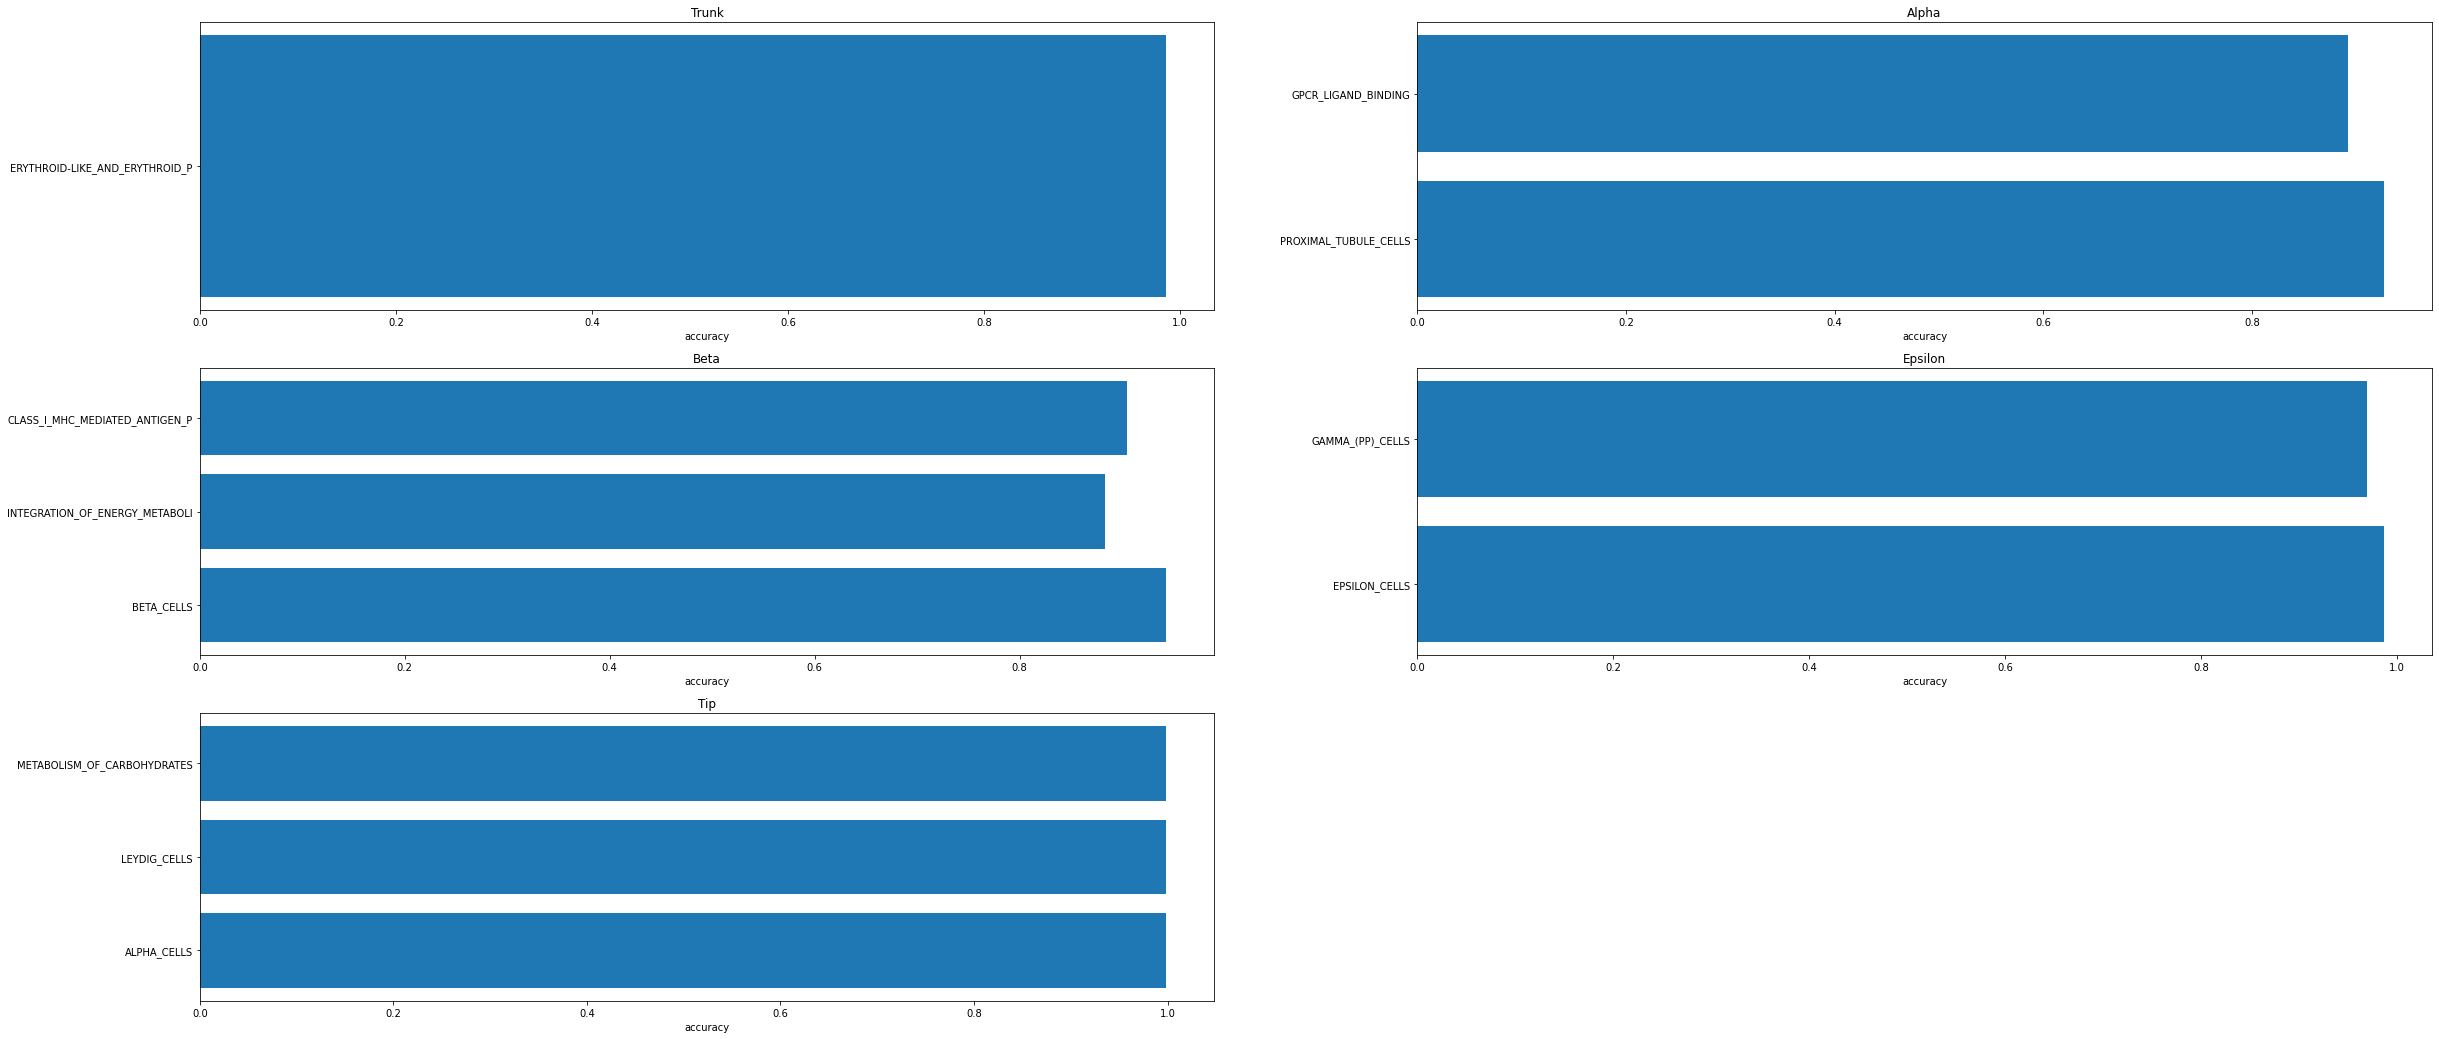

In [27]:
#plot accuracies per cell
from matplotlib import pyplot as plt
plt.figure(figsize=(40,18))
plt.title("SVM accuracy scored on training data for significant GPs")
cell_types1=["Trunk","Alpha","Beta","Epsilon", "Tip"]
for i, ct in enumerate(cell_types1):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")

    ind =expimap[ct]["terms"]
    xvals_expimap = expimap[ct]["acc"]
    plt.barh(ind, width = xvals_expimap)

In [ ]:
#plot accuracies per cell
plt.figure(figsize=(32,15))
plt.title("SVM accuracy scored on training data for significant GPs")
cell_types2=["Ductal","Delta","Multipotent"]
for i, ct in enumerate(cell_types2):
    
    plt.subplot(2,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")

    ind =top_gps_per_cell[ct]["terms"]
    xvals = acc[ct]
    plt.barh(ind, width = xvals)

([<matplotlib.axis.XTick at 0x7f35646a6220>,
 [Text(1, 0, 'expimap'), Text(2, 0, 'ivelo'), Text(3, 0, 'divelo')])

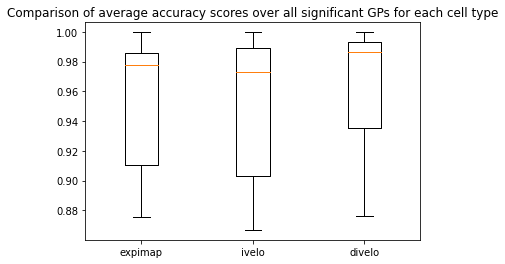

In [50]:
# Plot score distributions
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        avg_expimap.append(sum(expimap[ct]["acc"])/len(expimap[ct]["acc"]))
    if len(ivelo[ct]["terms"])!=0:
        avg_ivelo.append(sum(ivelo[ct]["acc"])/len(ivelo[ct]["acc"]))
    if len(divelo[ct]["terms"])!=0:
        avg_divelo.append(sum(divelo[ct]["acc"])/len(divelo[ct]["acc"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average accuracy scores over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
#ax1.boxplot(avg_ivelo)
#ax1.boxplot(avg_divelo)

In [ ]:
### Comparison of velocity

In [ ]:
#Compare the MSE for unspliced and spliced counts between Velo_interpret and original 

import pandas as pd
pred=vae.get_expression_fit()
pred_s=pred[0]
pred_u=pred[1]
GT_s=adata.layers["Ms"]
GT_u=adata.layers["Mu"]
MSE_s=np.mean((pred_s-GT_s)**2, axis=0)
MSE_u=np.mean((pred_u-GT_u)**2, axis=0)

velo_interpret_single_MSE=pd.DataFrame([MSE_s,MSE_u]).T

velo_interpret_single_MSE.to_csv("MSE_velo_interpret_single.csv")

# #Read in saved MSE from velovi_orig
# velo_orig_MSE=pd.read_csv("MSE_velovi_orig.csv", index_col="index")

# #Calculate log10 MSE ratios
# log10MSE_s=np.log10(velo_orig_MSE["0"]/velo_interpret_MSE[0])
# log10MSE_u=np.log10(velo_orig_MSE["1"]/velo_interpret_MSE[1])
# log10MSE_s=log10MSE_s.dropna()
# log10MSE_u=log10MSE_u.dropna()

# #Combine MSE for spliced and unspliced into 1 dataframe
# MSE_combined=pd.DataFrame([log10MSE_s,log10MSE_u]).T
# MSE_combined=MSE_combined.rename(columns={0:"spliced",1:"unspliced"})

In [ ]:
#Get violin plot of log10 MSEs
ax=sns.violinplot(data=MSE_combined)
ax.set_title("Log10 MSE Ratio Velo_orig/Velo_interpret")
MSE_fig=ax.get_figure()
#MSE_fig.savefig("figures/decoder2/log10MSE.png") 

In [ ]:
# velocity correlation

scvelo.utils.vcorrcoef(X, y, mode='pearsons', axis=-1)